Best-fit fold axis: trend = 125.3, plunge = 26.1
Best-fit plane: strike = 215.3, dip = 63.9

95% elliptical confidence cones:
Around axis 1: Max = 16.9, Min = 5.9
Around axis 3: Max = 8.2, Min = 5.8


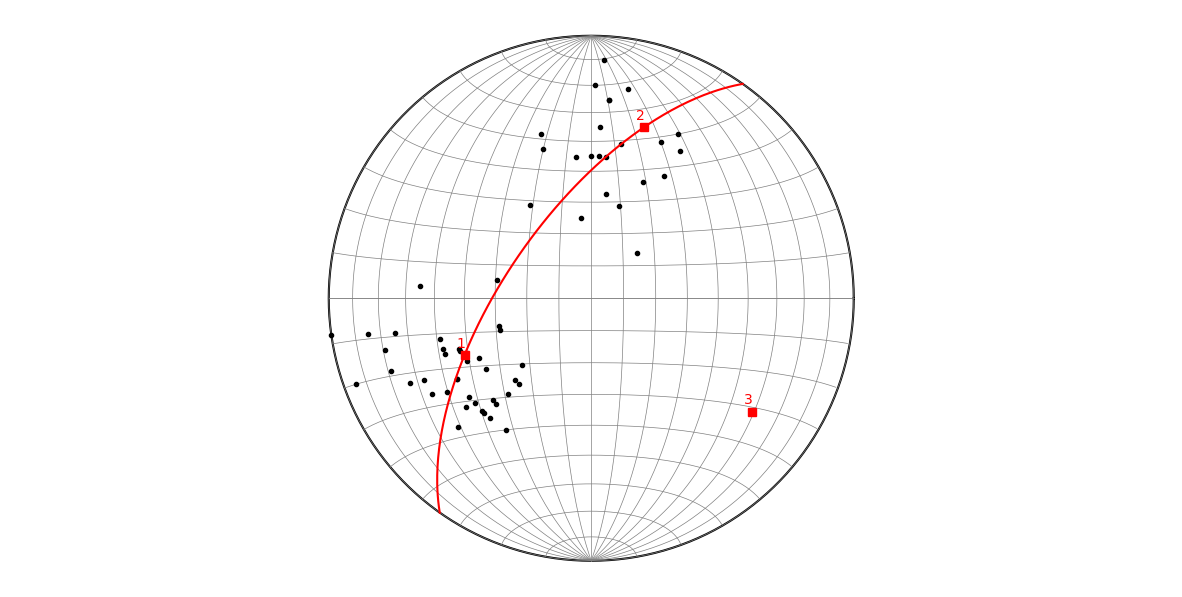

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

# Import functions 
import sys, os
sys.path.append(os.path.abspath("../functions"))
from pole import pole_from_plane
from bingham import bingham

# Read the bedding data from the Big Elk anticline
beasd =np.loadtxt(os.path.abspath("../data/ch6-1/beasd.txt"))
# Convert from degrees to radians
beasd = beasd*pi/180

# Initialize poles
T = np.zeros(len(beasd))
P = np.zeros(len(beasd))

# Compute poles to bedding
for i in range(len(T)):
     T[i],P[i] = pole_from_plane(beasd[i,0],beasd[i,1])

# Compute cylindrical best fit
# and plot in equal area stereonet
eigvec,confcone,bestfit, fig, ax = bingham(T,P,1)
# Convert from radians to degrees
eigvec = eigvec * 180/pi
confcone = confcone * 180/pi
bestfit = bestfit * 180/pi

# Print best-fit fold axis
print("Best-fit fold axis: trend = {:.1f}, plunge = {:.1f}"
      .format(eigvec[2,1],eigvec[2,2]))
# Print best-fit plane 
print("Best-fit plane: strike = {:.1f}, dip = {:.1f}\n"
      .format(bestfit[0],bestfit[1]))
# Print confidence cone
print("95% elliptical confidence cones:")
print("Around axis 1: Max = {:.1f}, Min = {:.1f}"
      .format(confcone[0,0],confcone[0,1]))
print("Around axis 3: Max = {:.1f}, Min = {:.1f}"
      .format(confcone[1,0],confcone[1,1]))

In [ ]:
# run this cell if you want to save the figure
fig.savefig("cil_bestfit.png", dpi=300)